In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(file_path, index_col=0)

In [ ]:
# How many patients do we have data for?
num_rows = 0
for index, row in df.iterrows():
    num_rows += 1

num_rows = num_rows - 1

print("Total number of patients: ", num_rows)

Total number of patients:  800


1. How many patients do we have data for?
- 800

In [ ]:
# How many genes are we measuring expression for?
num_cols = 0
for col in df.columns:
    num_cols += 1

print("Total number of genes: ", num_cols)

Total number of genes:  20531



2. How many genes are we measuring expression for?
- 20531

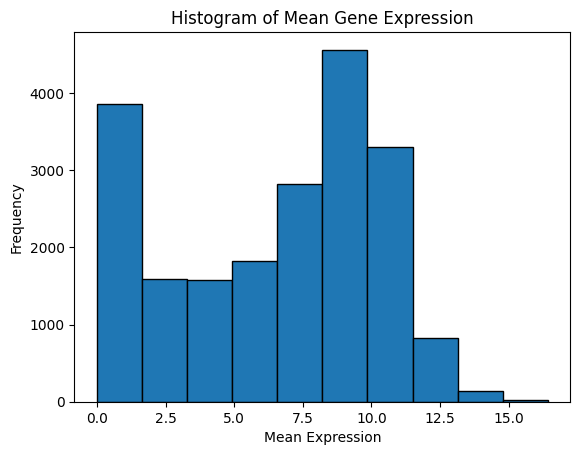

In [ ]:
# Plot a histogram of the mean gene expression with 10 bins. What do you observe?

mean_expression = df.mean()

# plot histogram
plt.hist(mean_expression, bins=10, edgecolor='black')
plt.title('Histogram of Mean Gene Expression')
plt.xlabel('Mean Expression')
plt.ylabel('Frequency')
plt.show()

It is not normally distributed.

In [ ]:
# Which gene has the maximum mean expression? (Calculate mean expression of each gene, find the one with the max.)
max_gene = mean_expression.idxmax()

print("The gene with the maximum mean expression is:", max_gene)

The gene with the maximum mean expression is: gene_230


4. Which gene has the maximum mean expression? (Calculate mean expression of each gene, find the one with the max.)
- gene_230

In [ ]:
label_df = pd.read_csv('labels.csv')
label_df.fillna(value = 5)

unique_cancers = label_df['Class'].unique()

print("Number of unique cancers is:", len(unique_cancers))

Number of unique cancers is: 5


5. How many unique cancers do we have in the dataset?
- 5

In [ ]:
k_values = [2, 3, 5, 6, 7, 8, 9]
best_sse = {}

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.values)

for k in k_values:
    best_sse_k = np.inf
    for i in range(7):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)
        kmeans.fit(data_scaled)
        sse = kmeans.inertia_
        if sse < best_sse_k:
            best_sse_k = sse
    best_sse[k] = best_sse_k

print("Best sum-squared-error for each k:")
for k, sse in best_sse.items():
    print(f"k = {k}: {sse:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best sum-squared-error for each k:
k = 2: 14820913.22
k = 3: 13821215.33
k = 5: 12197659.74
k = 6: 11791147.72
k = 7: 11470332.03
k = 8: 11271559.98
k = 9: 11126882.15


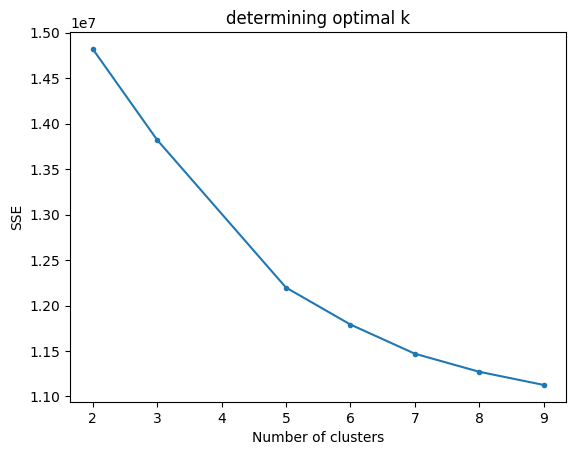

In [ ]:
k_values = list(best_sse.keys())
sse_values = list(best_sse.values())

plt.plot(k_values, sse_values, marker = '.')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('determining optimal k')
plt.show()

Optimal k value is 5, since k = 5 is the point of inflection or "elbow" in the SSE elbow plot, where the rate of decrease slows down significantly.

In [ ]:
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)
    kmeans.fit(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores[k] = silhouette_avg

print("Average silhouette scores for each k: ")
for k, silhouette_avg in silhouette_scores.items():
    print(f"k = {k}: {silhouette_avg:.2f}")


best_k = max(silhouette_scores, key=silhouette_scores.get)
print("The optimal k is ", best_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Average silhouette scores for each k: 
k = 2: 0.10
k = 3: 0.11
k = 5: 0.14
k = 6: 0.14
k = 7: 0.14
k = 8: 0.12
k = 9: 0.10
The optimal k is  7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-50-79f3cbcbc076>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / best_k)


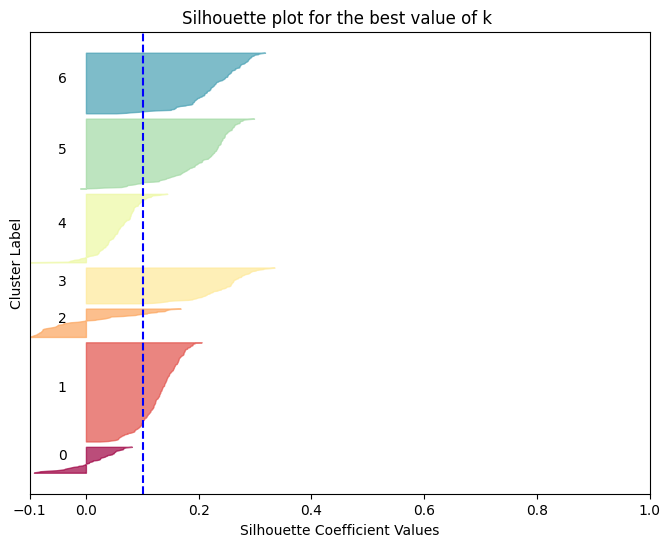

In [ ]:
from sklearn.metrics import silhouette_samples

best_kmeans = KMeans(n_clusters = best_k, init='k-means++', random_state=1)
best_kmeans.fit(data_scaled)
best_cluster_labels = best_kmeans.labels_

sample_silhouette_values = silhouette_samples(data_scaled, best_cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax1.set_title("Silhouette plot for the best value of k ".format(best_k))

ax1.set_xlim([-0.1, 1])
y_lower = 10

for i in range(best_k):
    ith_cluster_silhouette_values = sample_silhouette_values[best_cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / best_k)

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0,
                      ith_cluster_silhouette_values,
                      facecolor=color,
                      edgecolor=color,
                      alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color = "blue", linestyle = "dashed")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")

plt.show()



Does the best k (the optimal number of clusters) you have chosen match the true number of cancer types of the data?

- No it does not. The best k value obtained from the silhouette score is 7, whereas the true number of cancer types in the data is 5.
